# MSDS 631 - Lecture 10 (April 3, 2019)

## Basic Analysis of Stock Data

So far, we have focused on learning the fundamentals of programming so that we can be in a better place to tackle problems as we encounter them. It is often the case that early-stage Data Scientists will try to memorize the steps to execute an algorithm, but they never really learn how to solve problems. Unfortunately, no two problems are alike, and there is no such thing as a "process" to do it. In this exercise, I will show you a few more tools that are helpful when performing analyses. You may or may not need these tools, but we are now at a point where your problems will dictate which of the the vast selection of tools you may need to use.

This is a set of functions that returns all of the filepaths for data in a particular folder. This allows me to open multiple files at in succession

In [1]:
import os
import re
def get_file_paths(folder, full_path=True):
    file_paths = []
    for (dirpath, dirnames, filenames) in os.walk(folder):
        for file_ in filenames:
            if not re.match('\.', file_):
                if full_path:
                    file_paths.append(os.path.join(dirpath, file_))
                else:
                    file_paths.append((dirpath, file_))
    return file_paths


def get_all_paths(subfolder):
    folder = os.path.join(subfolder)
    files = get_file_paths(folder)
    return files

In [2]:
file_paths = get_all_paths('stock_prices')
file_paths

['stock_prices/AAPL.csv',
 'stock_prices/AMZN.csv',
 'stock_prices/BA.csv',
 'stock_prices/FB.csv',
 'stock_prices/GE.csv',
 'stock_prices/GOOG.csv']

In [3]:
import pandas as pd
from datetime import datetime as dt

#The code below tells Jupyter to let us see plots as we generate them. Otherwise, we'd have to take additional steps
%matplotlib inline

Splitting strings generates a list of strings that are broken up by the character you pass the "split" method. In this case we would get two strings: 'stock_prices' and 'AAPL.csv'

In [4]:
filename = 'stock_prices/AAPL.csv'.split('/')
print(filename)

['stock_prices', 'AAPL.csv']


If we take the second value of filename after the split, we'll have 'AAPL.csv'. Now let's get the stock ticker by splitting on the period.

In [5]:
ticker = filename[1].split('.')[0]
ticker

'AAPL'

Now that we know all of the code works, we can put it into a function so that we can call it over and over for each of the files in our directory.

In [6]:
def get_ticker_from_filepath(filepath):
    filename = filepath.split('/')[-1]
    ticker = filename.split('.')[0]
    return ticker

In [7]:
#Test the output for the first filepath
get_ticker_from_filepath(file_paths[0])

'AAPL'

Now let's build a function that loads the csv as a DataFrame. At the same time we are doing that, I want to add some functionality so that we can add a column called "ticker" and assign its value to each row of the DataFrame.

In [8]:
def get_df_from_file(filepath):
    df = pd.read_csv(filepath)
    ticker = get_ticker_from_filepath(filepath)
    df['ticker'] = ticker
    return df

In [9]:
#Let's try this once for the AAPL.csv file
aapl = get_df_from_file(file_paths[0])
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023007,117258400.0,AAPL
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021807,43971200.0,AAPL
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020206,26432000.0,AAPL
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020706,21610400.0,AAPL
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021307,18362400.0,AAPL


In [10]:
#Now let's open all of the files and store the DataFrames into a list
list_of_stock_histories = []
for f in file_paths:
    stock_df = get_df_from_file(f)
    list_of_stock_histories.append(stock_df)

len(list_of_stock_histories) #There were six files in the directory

Concatenating DataFrames allows us to take DataFrames with the same structure and stack them on top of one another. Doing so means that the index (which were the integer values of the rows) will be repeated. In order to ensure we have unique indices for each observation, we will reset the index. In this case, since we didn't need/want to keep the values of the old index, we "drop" it after resetting. Earlier in the class we reset the index when it was student_id. In that case skipped the "drop" argument so that it would return to its place as a column in the DataFrame

In [12]:
stock_histories_df = pd.concat(list_of_stock_histories)
stock_histories_df = stock_histories_df.reset_index(drop=True)
stock_histories_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023007,117258400.0,AAPL
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021807,43971200.0,AAPL
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020206,26432000.0,AAPL
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020706,21610400.0,AAPL
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021307,18362400.0,AAPL


### Analysis 1 - Comparing Stock Performance Over Time

In [13]:
#I always start by looking at the shape of my data (just like I check the length of my lists and the keys of my dicts)
stock_histories_df.shape

(49370, 8)

In [14]:
#The unique method for a Series will tell me all of the unique values. Casting the Series as a set would do the same
#This .unique() method will also order the output, which is sometimes handy but also unnecessary sometimes
#NOTE: Sorting is a fairly slow process by computing standards. I avoid it when possible
stock_histories_df['ticker'].unique()

array(['AAPL', 'AMZN', 'BA', 'FB', 'GE', 'GOOG'], dtype=object)

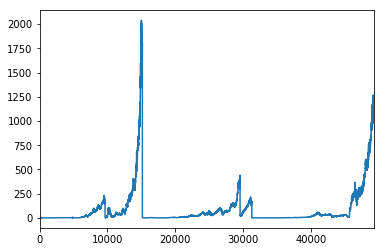

In [15]:
#Now we can try plotting the closing proces for all of the stocks.
stock_histories_df['Close'].plot()

In the code above, the plot function is using the closing prices as the y-value, but it is using the index of the combined DataFrame for the x-values. Thus, what you are seeing is essentially 6 different plots in succession.

A few weeks ago I showed you the datetime library. With it you could convert strings into useful objects that told you the year, month, day, weekday, etc about any given string date. It could also compute the difference between times and many other useful methods. Unfortunately it was also slow and cumbersome with many things to memorize to convert a string to the object. Pandas has solved htat with a great tool for converting strings into dates with FAR less to provide it in the way of instructions about what you want in return (it guesses the structure of the date string so you don't have to tell it. This works well 95% of the time).

The biggest advantage of to_datetime is that you can vectorize your output. Thus, if you have a Series of dates, you can convert them all without a cumbersome for-loop (and much faster than what you could yield from a for-loop).


In [17]:
stock_histories_df['Date'] = pd.to_datetime(stock_histories_df['Date'])

In [26]:
stock_histories_df['Date'][0] #Verify that it does return a Timestamp object rather than a string

Timestamp('1980-12-12 00:00:00')

You can do lots of nice things with timestamps in a Series. Just as we could do one-by-one on individual datetime objects, we can take entire Series of timestamps to extract a Series of years. If we wanted to, we could use this for filtering or other use cases comparing performance across several years.

In [27]:
stock_histories_df['Year'] = stock_histories_df['Date'].dt.year

In [78]:
stock_histories_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker,Year
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023007,117258400.0,AAPL,1980
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021807,43971200.0,AAPL,1980
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020206,26432000.0,AAPL,1980
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020706,21610400.0,AAPL,1980
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021307,18362400.0,AAPL,1980


In [18]:
#Here we are doing the same thing for month as we did for year. 
#We could use it to see whether any month in particular has higher volatility or lower volume
stock_histories_df['Month'] = stock_histories_df['Date'].dt.month

One of my favorite features of Pandas is the pivot_table. Much like excel, it takes a tall column of data and "pivots" it into a shorter more manageable rectangle. More importantly, it allows us to more easily compare things.

In [19]:
compare_stocks_df = stock_histories_df.pivot_table(index='Date', columns='ticker', values='Close')

In [20]:
compare_stocks_df.head()

ticker,AAPL,AMZN,BA,FB,GE,GOOG
Date,,,,,,
1962-01-02,NaN,NaN,0.823045,NaN,0.748698,NaN
1962-01-03,NaN,NaN,0.839506,NaN,0.741186,NaN
1962-01-04,NaN,NaN,0.831276,NaN,0.732422,NaN
1962-01-05,NaN,NaN,0.814815,NaN,0.713642,NaN
1962-01-08,NaN,NaN,0.816872,NaN,0.712390,NaN


In this case, the index contains all of the dates that were provided to it. Since GE and Boeing have been around for many many decades, they have much more stock history than our more recent tech giants. Rather than throw away data, Pandas shows you what you've got and just says "I have no data" for all of the instances where data simply does not exist.

We could go ahead and work with what we've got, but since our objective is to compare data across all six companies, we're going to focus only on rows where we have data for ALL of our companies. In this case, we will use the dropna() method for the DataFrame.

In [21]:
compare_stocks_df = compare_stocks_df.dropna()

In [23]:
#We now have data for all of our stock symbols.
compare_stocks_df.head()

ticker,AAPL,AMZN,BA,FB,GE,GOOG
Date,,,,,,
2012-05-18,75.768570,213.850006,69.150002,38.230000,18.221153,298.260101
2012-05-21,80.182854,218.110001,71.779999,34.029999,18.384615,305.070801
2012-05-22,79.567146,215.330002,71.480003,31.000000,18.442308,298.458801
2012-05-23,81.508568,217.279999,71.570000,32.000000,18.442308,302.760834
2012-05-24,80.760002,215.240005,71.389999,33.029999,18.509615,299.879578


In [24]:
compare_stocks_df.shape

(1724, 6)

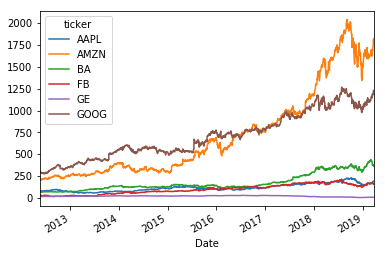

In [25]:
#NOW we can plot everybody on top of one another. THIS is a more useful plot to see growth since early 2012.
compare_stocks_df.plot()

It is not "fair" to compare stock prices for disparately priced stocks. A common way to measure stocks in a normalized fashion is to measure the percent change over time. In this case, we could simply compute the percent difference between the first date of the DataFrame and every other date in the DataFrame.

We start by getting the data from the first date. Below I show you two ways.

In [26]:
compare_stocks_df.loc[dt(2012,5,18)]

ticker
AAPL     75.768570
AMZN    213.850006
BA       69.150002
FB       38.230000
GE       18.221153
GOOG    298.260101
Name: 2012-05-18 00:00:00, dtype: float64

In [27]:
compare_stocks_df.iloc[0]

ticker
AAPL     75.768570
AMZN    213.850006
BA       69.150002
FB       38.230000
GE       18.221153
GOOG    298.260101
Name: 2012-05-18 00:00:00, dtype: float64

Now we can use vectorization and all of Pandas' handy built-in smarts to know that it wants to divide each row by our Series of prices from the first date.

In [28]:
normalized_df = compare_stocks_df / compare_stocks_df.iloc[0]

In [29]:
normalized_df.head(20)

ticker,AAPL,AMZN,BA,FB,GE,GOOG
Date,,,,,,
2012-05-18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2012-05-21,1.058260,1.019920,1.038033,0.890139,1.008971,1.022835
2012-05-22,1.050134,1.006921,1.033695,0.810882,1.012137,1.000666
2012-05-23,1.075757,1.016039,1.034996,0.837039,1.012137,1.015090
2012-05-24,1.065877,1.006500,1.032393,0.863981,1.015831,1.005430
2012-05-25,1.060164,0.995511,1.012292,0.834685,1.013193,0.985227
2012-05-29,1.078981,1.004209,1.018077,0.754381,1.021108,0.989907
2012-05-30,1.091991,0.978396,1.003471,0.737379,1.004749,0.979730
2012-05-31,1.089276,0.995604,1.006652,0.774261,1.007388,0.967455


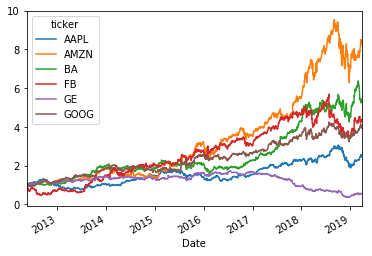

In [30]:
#This is more interesting and representative of what actually happened
normalized_df.plot()

Now that we've done it once, we should build a function to compute the percent price changes for ANY date range.

In [34]:
def plot_diff_between_dates(compare_stocks_df, start_date, end_date):
    start_filt = compare_stocks_df.index >= start_date
    end_filt = compare_stocks_df.index <= end_date
    subset_df = compare_stocks_df[start_filt & end_filt]
    beginning_prices = subset_df.iloc[0]
    normalized_df = subset_df / beginning_prices
    normalized_df.plot()

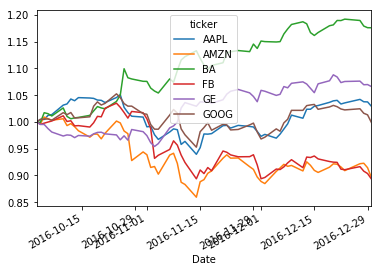

In [35]:
plot_diff_between_dates(compare_stocks_df, dt(2016, 10,1), dt(2016,12,31))

### Analysis 2 - Finding stocks' price on first trading day of each month
Let's do some slightly harder stuff using aggregations and joins.

If I wanted to know what the stock price was on the first day of each month for every year, I could just try to make an assumption that I'm going to literally take January 1, February 1, March 1, etc for every month for every year. Unfortunately there are many reasons why this would not work. First of all, January 1 is a National holiday in the U.S. and stocks aren't traded. Also, the first of the month will often fall on weekends. So I'm going to do some trickery to figure out what the closing stock price was on the first eligible trading day of each month throughout the period of data we have.

We'll start back with our **`compare_stocks_df`**

In [36]:
compare_stocks_df.head()

ticker,AAPL,AMZN,BA,FB,GE,GOOG
Date,,,,,,
2012-05-18,75.768570,213.850006,69.150002,38.230000,18.221153,298.260101
2012-05-21,80.182854,218.110001,71.779999,34.029999,18.384615,305.070801
2012-05-22,79.567146,215.330002,71.480003,31.000000,18.442308,298.458801
2012-05-23,81.508568,217.279999,71.570000,32.000000,18.442308,302.760834
2012-05-24,80.760002,215.240005,71.389999,33.029999,18.509615,299.879578


I'm going to go ahead and reset my index (and NOT drop the value because I want to keep it) so that I can do some timestamp stuff to it (You cannot use most expected methods when your data is in the index).

In [38]:
compare_stocks_df = compare_stocks_df.reset_index()
compare_stocks_df.head()
#Ignore the 'ticker' showing in the DataFrame. It's an artifact of the pivot_table.

ticker,index,Date,AAPL,AMZN,BA,FB,GE,GOOG
0,0,2012-05-18,75.768570,213.850006,69.150002,38.230000,18.221153,298.260101
1,1,2012-05-21,80.182854,218.110001,71.779999,34.029999,18.384615,305.070801
2,2,2012-05-22,79.567146,215.330002,71.480003,31.000000,18.442308,298.458801
3,3,2012-05-23,81.508568,217.279999,71.570000,32.000000,18.442308,302.760834
4,4,2012-05-24,80.760002,215.240005,71.389999,33.029999,18.509615,299.879578


Now I want to get the year, month and date of every row.

In [42]:
compare_stocks_df['year'] = compare_stocks_df['Date'].dt.year
compare_stocks_df['month'] = compare_stocks_df['Date'].dt.month
compare_stocks_df['day'] = compare_stocks_df['Date'].dt.day

In [43]:
compare_stocks_df.head()

ticker,Date,AAPL,AMZN,BA,FB,GE,GOOG,year,month,day
0,2012-05-18,75.768570,213.850006,69.150002,38.230000,18.221153,298.260101,2012,5,18
1,2012-05-21,80.182854,218.110001,71.779999,34.029999,18.384615,305.070801,2012,5,21
2,2012-05-22,79.567146,215.330002,71.480003,31.000000,18.442308,298.458801,2012,5,22
3,2012-05-23,81.508568,217.279999,71.570000,32.000000,18.442308,302.760834,2012,5,23
4,2012-05-24,80.760002,215.240005,71.389999,33.029999,18.509615,299.879578,2012,5,24


Let's use this data to find the lowest day for every year/month combination.

In [55]:
first_dates = compare_stocks_df.groupby(['year', 'month'])[['day']].min()

In [56]:
first_dates.head(10)

ticker      day
year month     
2012 5       18
     6        1
     7        2
     8        1
     9        4
     10       1
     11       1
     12       3
2013 1        2
     2        1

Now let's get our data back as columns so we can do a merge with the original data.

In [57]:
first_dates = first_dates.reset_index()

In [58]:
first_dates.head(10)
#Again, ignore the "ticker"... it is just a label for the headers from the pivot.

ticker,year,month,day
0,2012,5,18
1,2012,6,1
2,2012,7,2
3,2012,8,1
4,2012,9,4
5,2012,10,1
6,2012,11,1
7,2012,12,3
8,2013,1,2
9,2013,2,1


Now that we have the first days for each month of each year, can do a merge to get only the days we want.

In [59]:
first_day_prices = compare_stocks_df.merge(first_dates, how='inner', on=['year', 'month', 'day'])
first_day_prices.head(10)

ticker,Date,AAPL,AMZN,BA,FB,GE,GOOG,year,month,day
0,2012-05-18,75.768570,213.850006,69.150002,38.230000,18.221153,298.260101,2012,5,18
1,2012-06-01,80.141426,208.220001,67.239998,27.719999,17.826923,283.645172,2012,6,1
2,2012-07-02,84.645714,229.320007,73.180000,30.770000,19.701923,288.359497,2012,7,2
3,2012-08-01,86.687141,232.089996,72.769997,20.879999,19.932692,314.295807,2012,8,1
4,2012-09-04,96.424286,247.880005,70.870003,17.730000,19.721153,338.319550,2012,9,4
5,2012-10-01,94.198570,252.009995,70.010002,21.990000,21.932692,378.428680,2012,10,1
6,2012-11-01,85.220001,232.139999,70.790001,21.209999,20.519230,341.573395,2012,11,1
7,2012-12-03,83.741432,250.330002,74.019997,27.040001,20.019230,345.378632,2012,12,3
8,2013-01-02,78.432854,257.309998,77.070000,28.000000,20.519230,359.288177,2013,1,2
9,2013-02-01,64.802856,265.000000,74.870003,29.730000,21.750000,385.294037,2013,2,1


Let's clean things up and we'll be good to go.

In [60]:
first_day_prices = first_day_prices.drop(['year', 'month', 'day'], axis=1)

In [61]:
first_day_prices = first_day_prices.set_index('Date')

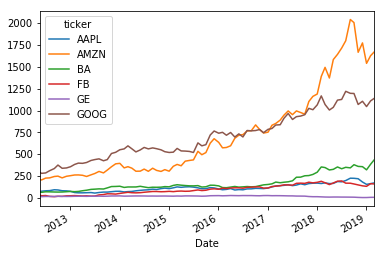

In [62]:
first_day_prices.plot()

### Analysis 3 - Finding each stock's longest streak of negative performance

In this analysis, we want to find how many consecutive days each stock had closing price lower than the previous day. Unfortunately, this is not something that can be done directly with Pandas. We'll start by setting the index to the Date, removing the year, month, and day columns we added earlier.

In [66]:
compare_stocks_df = compare_stocks_df.set_index('Date')

In [70]:
compare_stocks_df = compare_stocks_df.drop(['year', 'month', 'day'], axis=1)

Now let's use the built-in Pandas method to find the price differences for every single day.

In [71]:
price_diffs = compare_stocks_df.diff()

In [72]:
price_diffs.head()

ticker,AAPL,AMZN,BA,FB,GE,GOOG
Date,,,,,,
2012-05-18,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21,4.414284,4.259995,2.629997,-4.200001,0.163462,6.810700
2012-05-22,-0.615708,-2.779999,-0.299996,-3.029999,0.057693,-6.612000
2012-05-23,1.941422,1.949997,0.089997,1.000000,0.000000,4.302033
2012-05-24,-0.748566,-2.039994,-0.180001,1.029999,0.067307,-2.881256


Now we can use vectorization to find all of the negative values.

In [134]:
is_negative = pct_diffs < 0

In [135]:
is_negative.head()

ticker,AAPL,AMZN,BA,FB,GE,GOOG
Date,,,,,,
2012-05-18,False,False,False,False,False,False
2012-05-21,False,False,False,True,False,False
2012-05-22,True,True,True,True,False,True
2012-05-23,False,False,False,False,False,False
2012-05-24,True,True,True,False,False,True


In [140]:
is_negative['AAPL']

Date
2012-05-18    False
2012-05-21    False
2012-05-22     True
2012-05-23    False
2012-05-24     True
2012-05-25     True
2012-05-29    False
2012-05-30    False
2012-05-31     True
2012-06-01     True
2012-06-04    False
2012-06-05     True
2012-06-06    False
2012-06-07    False
2012-06-08    False
2012-06-11     True
2012-06-12    False
2012-06-13     True
2012-06-14     True
2012-06-15    False
2012-06-18    False
2012-06-19    False
2012-06-20     True
2012-06-21     True
2012-06-22    False
2012-06-25     True
2012-06-26    False
2012-06-27    False
2012-06-28     True
2012-06-29    False
              ...  
2019-02-13     True
2019-02-14    False
2019-02-15     True
2019-02-19    False
2019-02-20    False
2019-02-21     True
2019-02-22    False
2019-02-25    False
2019-02-26    False
2019-02-27    False
2019-02-28     True
2019-03-01    False
2019-03-04    False
2019-03-05     True
2019-03-06     True
2019-03-07     True
2019-03-08    False
2019-03-11    False
2019-03-12    F

Here's where we have to resort to good ol' fashioned Python to get what we need.

In [147]:
def find_bad_streak(is_negative, ticker):
    num_negative_days = 0
    longest_negative_streak = 0
    end_of_longest = dt(1970,1,1)
    counter = 0
    for i in is_negative[ticker]:
        if i == True:
            num_negative_days += 1
        else:
            if num_negative_days > longest_negative_streak:
                longest_negative_streak = num_negative_days
                end_of_longest = is_negative.index[counter]
            num_negative_days = 0
        counter += 1
    return {'longest_negative_streak': longest_negative_streak,
           'end_of_longest': end_of_longest}

In [148]:
all_worst_streaks = {}
for ticker in is_negative.columns:
    all_worst_streaks[ticker] = find_bad_streak(is_negative, ticker)

In [149]:
all_worst_streaks

{'AAPL': {'longest_negative_streak': 8,
  'end_of_longest': Timestamp('2016-05-03 00:00:00')},
 'AMZN': {'longest_negative_streak': 7,
  'end_of_longest': Timestamp('2016-01-11 00:00:00')},
 'BA': {'longest_negative_streak': 11,
  'end_of_longest': Timestamp('2018-11-26 00:00:00')},
 'FB': {'longest_negative_streak': 7,
  'end_of_longest': Timestamp('2013-05-30 00:00:00')},
 'GE': {'longest_negative_streak': 9,
  'end_of_longest': Timestamp('2017-11-03 00:00:00')},
 'GOOG': {'longest_negative_streak': 8,
  'end_of_longest': Timestamp('2018-01-02 00:00:00')}}

In [154]:
all_worst_streaks_df = pd.DataFrame.from_dict(all_worst_streaks, orient='index')

In [156]:
all_worst_streaks_df

,longest_negative_streak,end_of_longest
AAPL,8,2016-05-03
AMZN,7,2016-01-11
BA,11,2018-11-26
FB,7,2013-05-30
GE,9,2017-11-03
GOOG,8,2018-01-02
